In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler

# Biblioteca para fazer a NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler

# Bilioteca para separação de dados em treino e teste
from sklearn.model_selection import train_test_split

# Biblioteca para calcular a acuracia do modelo
from sklearn.metrics import accuracy_score

# Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier 

# Algoritmo SVM
from sklearn import svm

In [2]:
# Carregando o arquivo
df_original = pd.read_csv("./egypt_education_dataset.csv", sep = ",")

In [3]:
df_original

,Student Name,Student Age,Student year,Father Degree,Mother Degree,Education Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10
0,Allison Lang,18,Year 9,High School,High School,IB,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678
1,Jaclyn Mcneil,14,Year 9,Bachelor,PhD,IB,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158
2,Melissa Lee,16,Year 10,NaN,PhD,IB,100.000000,83.985923,89.378162,82.446853,86.368818,90.347020,100.000000,83.972296,69.212961,79.206634
3,Timothy Maxwell,14,Year 10,Bachelor,Bachelor,Thanweya,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706
4,Eric Steele,17,Year 11,PhD,NaN,IGCSE,74.906144,69.518146,65.284841,56.317028,69.758140,85.810641,63.776955,61.802599,84.951132,68.146467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Bruce Vargas,15,Year 11,NaN,Master,IB,84.760901,96.154122,71.428657,52.579123,62.243286,63.188827,93.744022,72.375436,77.848848,66.807401
49996,Clarence Foley,16,Year 11,NaN,PhD,IGCSE,82.196281,84.939252,56.661299,88.210451,84.573156,73.009089,68.842074,76.605868,76.255564,80.606913
49997,Dawn Palmer,14,Year 10,PhD,PhD,Thanweya,90.035457,30.790153,64.771808,82.749067,52.774571,65.665893,74.760145,74.148929,64.687866,86.811651
49998,Albert Berry,15,Year 10,PhD,Bachelor,Thanweya,58.177784,81.879862,86.309918,100.000000,77.616452,89.898231,62.805221,57.548277,70.028551,80.779414


In [4]:
traducao = {
    'Student Name': 'Nome do Aluno',
    'Student Age': 'Idade do Aluno',
    'Student year': 'Ano do Aluno',
    'Father Degree': 'Grau do Pai',
    'Mother Degree': 'Grau da Mãe',
    'Education Type': 'Tipo de Educação',
    'Subject_1': 'matéria 1',
    'Subject_2': 'matéria 2',
    'Subject_3': 'matéria 3',
    'Subject_4': 'matéria 4',
    'Subject_5': 'matéria 5',
    'Subject_6': 'matéria 6',
    'Subject_7': 'matéria 7',
    'Subject_8': 'matéria 8',
    'Subject_9': 'matéria 9',
    'Subject_10': 'matéria 10'
}
df_original= df_original.rename(columns=traducao)

In [5]:
df_original.dropna(inplace=True)

In [6]:
df_original

,Nome do Aluno,Idade do Aluno,Ano do Aluno,Grau do Pai,Grau da Mãe,Tipo de Educação,matéria 1,matéria 2,matéria 3,matéria 4,matéria 5,matéria 6,matéria 7,matéria 8,matéria 9,matéria 10
0,Allison Lang,18,Year 9,High School,High School,IB,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678
1,Jaclyn Mcneil,14,Year 9,Bachelor,PhD,IB,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158
3,Timothy Maxwell,14,Year 10,Bachelor,Bachelor,Thanweya,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706
5,Gabriel Brown,15,Year 11,Bachelor,Master,IB,72.529418,84.630127,88.036813,83.419565,95.994759,81.416093,78.758795,46.535227,77.553887,59.407396
6,Carolyn Erickson,18,Year 10,Bachelor,High School,IGCSE,83.733170,53.490681,64.176832,74.788082,64.961130,69.594212,80.826295,72.337257,88.716768,93.395562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,Luis Silva,16,Year 10,Bachelor,High School,Thanweya,89.109887,70.881619,77.921983,65.531953,68.075330,83.834681,84.447004,81.729059,99.405932,88.354423
49994,Sherri Smith,18,Year 9,PhD,High School,Thanweya,90.426678,67.660704,89.317914,69.488720,64.402254,84.985474,100.000000,100.000000,94.305701,57.383317
49997,Dawn Palmer,14,Year 10,PhD,PhD,Thanweya,90.035457,30.790153,64.771808,82.749067,52.774571,65.665893,74.760145,74.148929,64.687866,86.811651
49998,Albert Berry,15,Year 10,PhD,Bachelor,Thanweya,58.177784,81.879862,86.309918,100.000000,77.616452,89.898231,62.805221,57.548277,70.028551,80.779414


In [7]:
df_original = df_original.drop('Nome do Aluno', axis=1)

In [8]:
df_original

,Idade do Aluno,Ano do Aluno,Grau do Pai,Grau da Mãe,Tipo de Educação,matéria 1,matéria 2,matéria 3,matéria 4,matéria 5,matéria 6,matéria 7,matéria 8,matéria 9,matéria 10
0,18,Year 9,High School,High School,IB,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678
1,14,Year 9,Bachelor,PhD,IB,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158
3,14,Year 10,Bachelor,Bachelor,Thanweya,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706
5,15,Year 11,Bachelor,Master,IB,72.529418,84.630127,88.036813,83.419565,95.994759,81.416093,78.758795,46.535227,77.553887,59.407396
6,18,Year 10,Bachelor,High School,IGCSE,83.733170,53.490681,64.176832,74.788082,64.961130,69.594212,80.826295,72.337257,88.716768,93.395562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,16,Year 10,Bachelor,High School,Thanweya,89.109887,70.881619,77.921983,65.531953,68.075330,83.834681,84.447004,81.729059,99.405932,88.354423
49994,18,Year 9,PhD,High School,Thanweya,90.426678,67.660704,89.317914,69.488720,64.402254,84.985474,100.000000,100.000000,94.305701,57.383317
49997,14,Year 10,PhD,PhD,Thanweya,90.035457,30.790153,64.771808,82.749067,52.774571,65.665893,74.760145,74.148929,64.687866,86.811651
49998,15,Year 10,PhD,Bachelor,Thanweya,58.177784,81.879862,86.309918,100.000000,77.616452,89.898231,62.805221,57.548277,70.028551,80.779414


In [9]:
nova_coluna_media = 'Media Matérias'

# Nova coluna "Media Matérias"

df_original[nova_coluna_media] = df_original[['matéria 1', 'matéria 2', 'matéria 3', 'matéria 4', 'matéria 5', 'matéria 6', 'matéria 7', 'matéria 8', 'matéria 9', 'matéria 10']].mean(axis=1)


In [10]:
import numpy as np

# Nova coluna "Desempenho Aprovado"
df_original['Desempenho Aprovado'] = np.where(df_original[nova_coluna_media] > 70, 1, 0)


In [11]:
df_original

,Idade do Aluno,Ano do Aluno,Grau do Pai,Grau da Mãe,Tipo de Educação,matéria 1,matéria 2,matéria 3,matéria 4,matéria 5,matéria 6,matéria 7,matéria 8,matéria 9,matéria 10,Media Matérias,Desempenho Aprovado
0,18,Year 9,High School,High School,IB,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678,71.894448,1
1,14,Year 9,Bachelor,PhD,IB,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158,72.512281,1
3,14,Year 10,Bachelor,Bachelor,Thanweya,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706,80.378611,1
5,15,Year 11,Bachelor,Master,IB,72.529418,84.630127,88.036813,83.419565,95.994759,81.416093,78.758795,46.535227,77.553887,59.407396,76.828208,1
6,18,Year 10,Bachelor,High School,IGCSE,83.733170,53.490681,64.176832,74.788082,64.961130,69.594212,80.826295,72.337257,88.716768,93.395562,74.601999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,16,Year 10,Bachelor,High School,Thanweya,89.109887,70.881619,77.921983,65.531953,68.075330,83.834681,84.447004,81.729059,99.405932,88.354423,80.929187,1
49994,18,Year 9,PhD,High School,Thanweya,90.426678,67.660704,89.317914,69.488720,64.402254,84.985474,100.000000,100.000000,94.305701,57.383317,81.797076,1
49997,14,Year 10,PhD,PhD,Thanweya,90.035457,30.790153,64.771808,82.749067,52.774571,65.665893,74.760145,74.148929,64.687866,86.811651,68.719554,0
49998,15,Year 10,PhD,Bachelor,Thanweya,58.177784,81.879862,86.309918,100.000000,77.616452,89.898231,62.805221,57.548277,70.028551,80.779414,76.504371,1


In [12]:
# Valores de 1 e 0
contagem = df_original['Desempenho Aprovado'].value_counts()
print(contagem)


Desempenho Aprovado
1    27058
0     4826
Name: count, dtype: int64


In [13]:
valores_unicos = sorted(df_original['Ano do Aluno'].unique())
print(valores_unicos)


['Year 10', 'Year 11', 'Year 12', 'Year 9']


In [14]:
valores_unicos = sorted(df_original['Grau do Pai'].unique())
print(valores_unicos)


['Bachelor', 'High School', 'Master', 'PhD']


In [15]:
valores_unicos = sorted(df_original['Grau da Mãe'].unique())
print(valores_unicos)



['Bachelor', 'High School', 'Master', 'PhD']


In [16]:
valores_unicos = sorted(df_original['Tipo de Educação'].unique())
print(valores_unicos)




['IB', 'IGCSE', 'Thanweya']


In [17]:
ano = {
    'Year 9': 1,
    'Year 10': 2,
    'Year 11': 3, 
    'Year 12': 4
}

# att valores 
df_original['Ano do Aluno'] = df_original['Ano do Aluno'].replace(ano)

C:\Users\User\AppData\Local\Temp\ipykernel_7332\1493721048.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_original['Ano do Aluno'] = df_original['Ano do Aluno'].replace(ano)


In [18]:
grau = {
    'Bachelor': 1,
    'PhD': 2,
    'High School': 3,
    'Master': 4
}

# att valores 
df_original[['Grau do Pai', 'Grau da Mãe']] = df_original[['Grau do Pai', 'Grau da Mãe']].replace(grau)

C:\Users\User\AppData\Local\Temp\ipykernel_7332\4225993384.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_original[['Grau do Pai', 'Grau da Mãe']] = df_original[['Grau do Pai', 'Grau da Mãe']].replace(grau)


In [19]:
edu = {
    'IB': 1,
    'IGCSE': 2, 
    'Thanweya': 3
}

# att valores 
df_original['Tipo de Educação'] = df_original['Tipo de Educação'].replace(edu)

C:\Users\User\AppData\Local\Temp\ipykernel_7332\707715512.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_original['Tipo de Educação'] = df_original['Tipo de Educação'].replace(edu)


In [20]:
df_original

,Idade do Aluno,Ano do Aluno,Grau do Pai,Grau da Mãe,Tipo de Educação,matéria 1,matéria 2,matéria 3,matéria 4,matéria 5,matéria 6,matéria 7,matéria 8,matéria 9,matéria 10,Media Matérias,Desempenho Aprovado
0,18,1,3,3,1,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678,71.894448,1
1,14,1,1,2,1,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158,72.512281,1
3,14,2,1,1,3,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706,80.378611,1
5,15,3,1,4,1,72.529418,84.630127,88.036813,83.419565,95.994759,81.416093,78.758795,46.535227,77.553887,59.407396,76.828208,1
6,18,2,1,3,2,83.733170,53.490681,64.176832,74.788082,64.961130,69.594212,80.826295,72.337257,88.716768,93.395562,74.601999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,16,2,1,3,3,89.109887,70.881619,77.921983,65.531953,68.075330,83.834681,84.447004,81.729059,99.405932,88.354423,80.929187,1
49994,18,1,2,3,3,90.426678,67.660704,89.317914,69.488720,64.402254,84.985474,100.000000,100.000000,94.305701,57.383317,81.797076,1
49997,14,2,2,2,3,90.035457,30.790153,64.771808,82.749067,52.774571,65.665893,74.760145,74.148929,64.687866,86.811651,68.719554,0
49998,15,2,2,1,3,58.177784,81.879862,86.309918,100.000000,77.616452,89.898231,62.805221,57.548277,70.028551,80.779414,76.504371,1


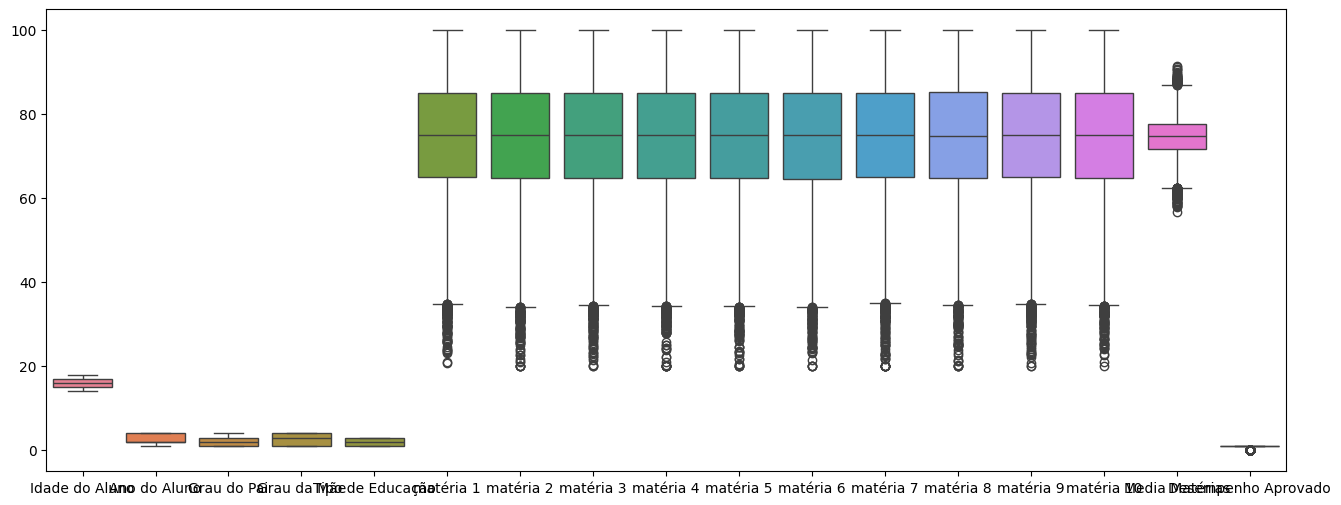

In [21]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_original)

# SVM - ORIGINAL

In [22]:
VAR_PREDITORAS_ORIG = df_original.drop('Desempenho Aprovado', axis = 1)

In [23]:
VAR_TARGET = df_original['Desempenho Aprovado']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(VAR_PREDITORAS_ORIG, VAR_TARGET, test_size = 0.3, random_state = 42)

In [25]:
from sklearn.svm import SVC
svm = svm.SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
resultados = svm.predict(X_test)

In [27]:
score = accuracy_score(y_test, resultados)*100
score

99.916370478779

# KNN - ORIGINAL 


In [28]:
VAR_PREDITORAS_ORIG = df_original.drop('Desempenho Aprovado', axis = 1)

In [29]:
VAR_TARGET = df_original['Desempenho Aprovado']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(VAR_PREDITORAS_ORIG, VAR_TARGET, test_size = 0.3, random_state = 42)

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
resultados = knn.predict(X_test)

In [34]:
score = accuracy_score(y_test, resultados)*100
score

93.60234162659418

# Padronizando

In [35]:
# Criando um objeto para PADRONIZAÇÃO dos dados
obj_padronizacao = StandardScaler().fit(df_original)

In [36]:
# Aplicando a PADRONIZAÇÃO
df_padronizado = obj_padronizacao.transform(df_original)

In [37]:

df_padronizado

array([[ 1.4071156 , -1.34256194,  0.46520992, ..., -1.0858176 ,
        -0.61785744,  0.42232405],
       [-1.41957168, -1.34256194, -1.32943656, ...,  0.2639368 ,
        -0.48206529,  0.42232405],
       [-1.41957168, -0.44748322, -1.32943656, ..., -1.53623258,
         1.24685756,  0.42232405],
       ...,
       [-1.41957168, -0.44748322, -0.43211332, ...,  0.8423236 ,
        -1.31566013, -2.36785   ],
       [-0.71289986, -0.44748322, -0.43211332, ...,  0.42290075,
         0.39534716,  0.42232405],
       [ 1.4071156 ,  1.34267423, -0.43211332, ...,  0.09964197,
        -1.93382906, -2.36785   ]])

In [38]:
# Transformando para DataFrame e nomeando as colunas
df_padronizado = pd.DataFrame(df_padronizado)
df_padronizado.columns = ['Idade do Aluno',	'Ano do Aluno',	'Grau do Pai',	'Grau da Mãe',	'Tipo de Educação',	'matéria 1',	'matéria 2',	
                          'matéria 3',	'matéria 4',	'matéria 5',	'matéria 6',	'matéria 7',	'matéria 8',	'matéria 9',	'matéria 10',	'Media Matérias',	'Desempenho Aprovado']

# Visualizando os dados padronizados
df_padronizado.head()

,Idade do Aluno,Ano do Aluno,Grau do Pai,Grau da Mãe,Tipo de Educação,matéria 1,matéria 2,matéria 3,matéria 4,matéria 5,matéria 6,matéria 7,matéria 8,matéria 9,matéria 10,Media Matérias,Desempenho Aprovado
0,1.407116,-1.342562,0.465210,0.441634,-1.206743,-0.180262,0.779266,-0.623131,0.657784,0.249745,-1.664646,-0.321044,0.385126,-0.139597,-1.085818,-0.617857,0.422324
1,-1.419572,-1.342562,-1.329437,-0.451438,-1.206743,1.170623,-0.106398,-0.724589,-1.886981,0.596335,-0.535220,-2.234758,0.920164,1.008943,0.263937,-0.482065,0.422324
2,-1.419572,-0.447483,-1.329437,-1.344510,1.235079,1.134284,1.756947,0.288548,0.257910,-0.698869,0.510977,-0.335150,1.137295,1.429582,-1.536233,1.246858,0.422324
3,-0.712900,0.447596,-1.329437,1.334706,-1.206743,-0.159846,0.688855,0.931037,0.605718,1.494838,0.467466,0.283830,-1.959889,0.198270,-1.063101,0.466523,0.422324
4,1.407116,-0.447483,-1.329437,0.441634,0.014168,0.621663,-1.475106,-0.729001,0.001905,-0.674066,-0.349892,0.427788,-0.167607,0.976852,1.300105,-0.022771,0.422324


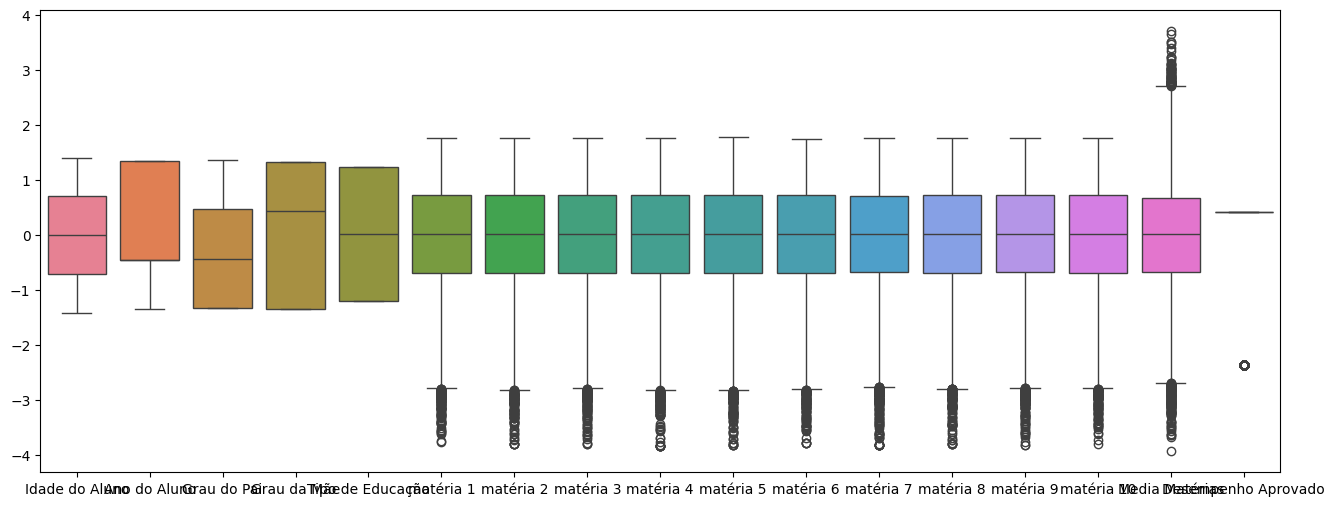

In [39]:
# Gerando os BoxPlot dos dados Padronizados
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_padronizado)

# Normalizando

In [40]:
# Criando um objeto para NORMALIZAR os dados
obj_normalizacao = MinMaxScaler().fit(df_original)

In [41]:
# Aplicando a NORMALIZAÇÃO
df_normalizado = obj_normalizacao.transform(df_original)

In [42]:

df_normalizado

array([[1.        , 0.        , 0.66666667, ..., 0.48850848, 0.43392749,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.73116447, 0.45172241,
        1.        ],
       [0.        , 0.33333333, 0.        , ..., 0.40753382, 0.67828964,
        1.        ],
       ...,
       [0.        , 0.33333333, 0.33333333, ..., 0.83514563, 0.34248372,
        0.        ],
       [0.25      , 0.33333333, 0.33333333, ..., 0.75974268, 0.56670319,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.7016279 , 0.26147559,
        0.        ]])

In [43]:
# Transformando para DataFrame e nomeando as colunas
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ['Idade do Aluno',	'Ano do Aluno',	'Grau do Pai',	'Grau da Mãe',	'Tipo de Educação',	'matéria 1',	'matéria 2',	
                          'matéria 3',	'matéria 4',	'matéria 5',	'matéria 6',	'matéria 7',	'matéria 8',	'matéria 9',	'matéria 10',	'Media Matérias',	'Desempenho Aprovado']


df_normalizado.head()

,Idade do Aluno,Ano do Aluno,Grau do Pai,Grau da Mãe,Tipo de Educação,matéria 1,matéria 2,matéria 3,matéria 4,matéria 5,matéria 6,matéria 7,matéria 8,matéria 9,matéria 10,Media Matérias,Desempenho Aprovado
0,1.00,0.000000,0.666667,0.666667,0.0,0.649192,0.824139,0.571231,0.802048,0.727243,0.382228,0.625896,0.753681,0.658872,0.488508,0.433927,1.0
1,0.00,0.000000,0.000000,0.333333,0.0,0.893899,0.664830,0.553003,0.347332,0.789232,0.586421,0.282340,0.849963,0.864711,0.731164,0.451722,1.0
2,0.00,0.333333,0.000000,0.000000,1.0,0.887317,1.000000,0.735028,0.730596,0.557578,0.775568,0.623364,0.889036,0.940097,0.407534,0.678290,1.0
3,0.25,0.666667,0.000000,1.000000,0.0,0.652890,0.807877,0.850460,0.792745,0.949934,0.767701,0.734485,0.331690,0.719424,0.492592,0.576030,1.0
4,1.00,0.333333,0.000000,0.666667,0.5,0.794457,0.418634,0.552210,0.684851,0.562014,0.619928,0.760329,0.654216,0.858960,0.917445,0.511911,1.0


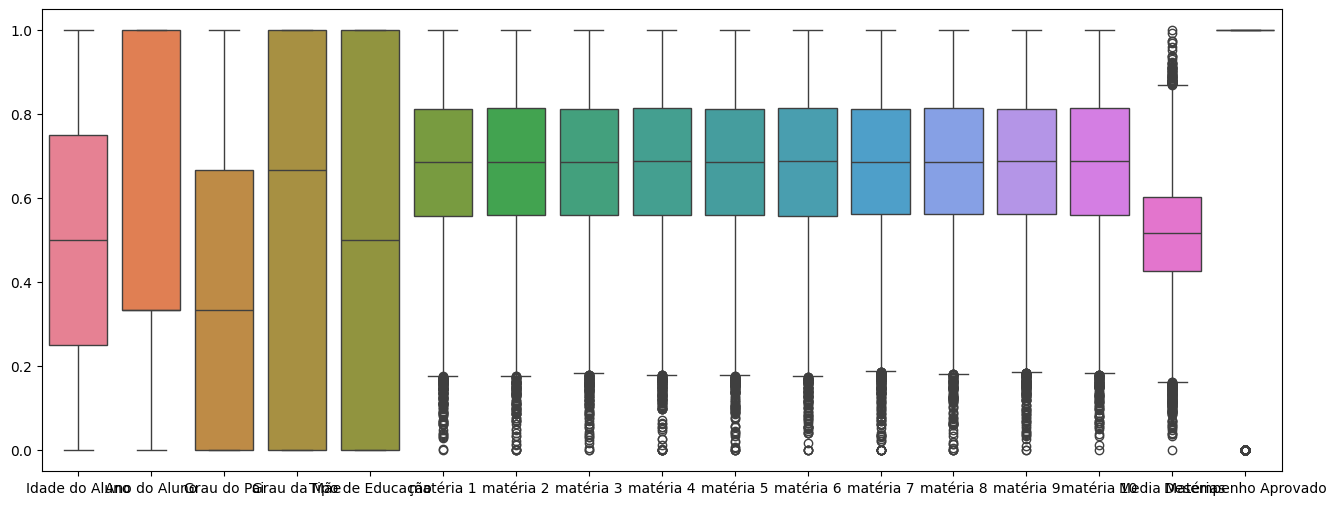

In [44]:

plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_normalizado)

# KNN - PADRONIZADO 

In [45]:
# Gerando um DataFrame das variáveis preditoras PADRONIZADAS SEM a variável TARGET
VAR_PREDITORAS_PADRON = df_padronizado.drop('Desempenho Aprovado', axis = 1)

In [46]:
# Gerando um DataFrame somente da variavel TARGET

VAR_TARGET = df_original['Desempenho Aprovado']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(VAR_PREDITORAS_PADRON, VAR_TARGET, test_size = 0.3, random_state = 42)

In [48]:
knn = KNeighborsClassifier()

In [49]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
resultados = knn.predict(X_test)

In [51]:
score = accuracy_score(y_test, resultados)*100
score

93.63370269705206

# SVM - PADRONIZADO


In [52]:
# Gerando um DataFrame das variáveis preditoras PADRONIZADAS SEM a variável TARGET
VAR_PREDITORAS_PADRON = df_padronizado.drop('Desempenho Aprovado', axis = 1)

In [53]:
# Gerando um DataFrame somente da variavel TARGET
VAR_TARGET = df_original['Desempenho Aprovado']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(VAR_PREDITORAS_PADRON, VAR_TARGET, test_size = 0.3, random_state = 42)

In [55]:
svm = svm
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [56]:
resultados = svm.predict(X_test)

In [57]:
score = accuracy_score(y_test, resultados)*100
score

99.83274095755802

# KNN - NORMALIZADO

In [58]:
# Gerando um DataFrame das variáveis preditoras Normalizadas SEM a variável TARGET
VAR_PREDITORAS_NORM = df_normalizado.drop('Desempenho Aprovado', axis = 1)

In [59]:
# Gerando um DataFrame somente da variavel TARGET

VAR_TARGET = df_original['Desempenho Aprovado']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(VAR_PREDITORAS_NORM, VAR_TARGET, test_size = 0.3, random_state = 42)

In [61]:
knn = KNeighborsClassifier()

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
resultados = knn.predict(X_test)

In [64]:
score = accuracy_score(y_test, resultados)*100
score

89.9749111436337

# SVM - NORMALIZADO

In [65]:
# Gerando um DataFrame das variáveis preditoras Normalizadas SEM a variável TARGET
VAR_PREDITORAS_NORM = df_normalizado.drop('Desempenho Aprovado', axis = 1)

In [66]:
# Gerando um DataFrame somente da variavel TARGET
VAR_TARGET = df_original['Desempenho Aprovado']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(VAR_PREDITORAS_NORM, VAR_TARGET, test_size = 0.3, random_state = 42)

In [68]:
svm = svm
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [69]:
resultados = svm.predict(X_test)

In [70]:
score = accuracy_score(y_test, resultados)*100
score

99.57139870374242